In [13]:
# Step 1: Collecting User Data

# Asking the user for their financial information
income = float(input("Enter your monthly income (in ₹): "))
expenses = float(input("Enter your total monthly expenses (in ₹): "))
goal = input("What is your primary financial goal? (e.g., save for vacation, buy a car, invest, etc.): ")

# Print what the user entered
print("\nYour Financial Summary:")
print(f"Monthly Income: ₹{income}")
print(f"Monthly Expenses: ₹{expenses}")
print(f"Financial Goal: {goal}")



Your Financial Summary:
Monthly Income: ₹70000.0
Monthly Expenses: ₹30000.0
Financial Goal: car


In [14]:
# Step 2: Basic Budget Suggestion

# Calculate the remaining balance
balance = income - expenses

# Suggest budgeting strategy
print("Budget Suggestion:")
if balance <= 0:
    print("You're spending more or equal to your income. Consider reducing unnecessary expenses.")
else:
    # 50/30/20 Budget Rule
    needs = income * 0.5
    wants = income * 0.3
    savings = income * 0.2

    print(f"Suggested budget (based on the 50/30/20 rule):")
    print(f"  - Needs (rent, food, bills): ₹{needs}")
    print(f"  - Wants (entertainment, eating out): ₹{wants}")
    print(f"  - Savings/Investments: ₹{savings}")

    # Compare actual spending
    if expenses > needs + wants:
        print("Tip: You're spending too much. Try cutting down on wants.")

    # Simple goal suggestion
    if goal.lower() in ["save", "vacation", "car", "house", "invest"]:
        print("Suggestion: Start a recurring deposit with ₹", round(balance * 0.5))


Budget Suggestion:
Suggested budget (based on the 50/30/20 rule):
  - Needs (rent, food, bills): ₹35000.0
  - Wants (entertainment, eating out): ₹21000.0
  - Savings/Investments: ₹14000.0
Suggestion: Start a recurring deposit with ₹ 20000


In [15]:
# Step 3: Rule-Based Recommendations (Mini AI)

print("Personalized Recommendations:")

# Insurance suggestion
if income > 25000 and balance > 5000:
    print("You can afford a basic health insurance plan (~₹500/month). Check out government schemes like Ayushman Bharat or private plans like Star Health.")
else:
    print("Tip: Consider a government-backed insurance plan with low premiums like PM-JAY.")

# Investment options
if balance > 3000:
    print("Consider starting a SIP (Systematic Investment Plan) in mutual funds with ₹500–1000/month.")
    print("You can use apps like Groww, Zerodha Coin, or Paytm Money to start.")
else:
    print("Your current balance is a bit low for investments. First focus on saving ₹1000–₹2000/month.")

# Savings goal tip
if goal.lower() in ["car", "vacation", "house"]:
    print("Suggestion: Open a Recurring Deposit (RD) or Fixed Deposit (FD) for your goal.")


Personalized Recommendations:
You can afford a basic health insurance plan (~₹500/month). Check out government schemes like Ayushman Bharat or private plans like Star Health.
Consider starting a SIP (Systematic Investment Plan) in mutual funds with ₹500–1000/month.
You can use apps like Groww, Zerodha Coin, or Paytm Money to start.
Suggestion: Open a Recurring Deposit (RD) or Fixed Deposit (FD) for your goal.


In [16]:
import pandas as pd
import random

# Define possible options
goals = ['vacation', 'retirement', 'emergency_fund', 'buy_car', 'buy_house']
risk_levels = ['low', 'medium', 'high']

# Generate 1000 rows of synthetic data
data = []
for _ in range(1000):
    income = random.randint(15000, 100000)
    expenses = random.randint(int(income * 0.5), int(income * 0.9))
    goal = random.choice(goals)
    risk = random.choice(risk_levels)

    # Rule-based logic to create labels
    savings = income - expenses
    savings_recommended = max(1000, int(savings * 0.5)) if savings > 0 else 0
    invest = 'Yes' if savings > 3000 and risk in ['medium', 'high'] else 'No'
    insurance = 'Yes' if income > 25000 and expenses > (income * 0.6) else 'No'

    data.append([income, expenses, goal, risk, savings_recommended, invest, insurance])

# Create DataFrame
df = pd.DataFrame(data, columns=[
    'Income', 'Expenses', 'Goal', 'Risk_Level',
    'Savings_Recommended', 'Invest_Recommended', 'Insurance_Recommended'
])

# Save as CSV
df.to_csv('synthetic_finance_data.csv', index=False)
print("Dataset generated and saved as 'synthetic_finance_data.csv'")

# Preview the data
df.head()


Dataset generated and saved as 'synthetic_finance_data.csv'


,Income,Expenses,Goal,Risk_Level,Savings_Recommended,Invest_Recommended,Insurance_Recommended
0,23214,18706,buy_car,low,2254,No,No
1,87306,57871,buy_house,medium,14717,Yes,Yes
2,71486,44759,buy_car,high,13363,Yes,Yes
3,53130,38070,emergency_fund,high,7530,Yes,Yes
4,42620,35710,emergency_fund,low,3455,No,Yes


In [17]:
# Importing pandas and matplotlib for data exploration and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file we just created
df = pd.read_csv('synthetic_finance_data.csv')

# Show the first 5 rows of the dataset
print("Here's a preview of your dataset:")
df.head()


Here's a preview of your dataset:


,Income,Expenses,Goal,Risk_Level,Savings_Recommended,Invest_Recommended,Insurance_Recommended
0,23214,18706,buy_car,low,2254,No,No
1,87306,57871,buy_house,medium,14717,Yes,Yes
2,71486,44759,buy_car,high,13363,Yes,Yes
3,53130,38070,emergency_fund,high,7530,Yes,Yes
4,42620,35710,emergency_fund,low,3455,No,Yes


In [18]:
# Summary statistics for numeric columns
print("Summary statistics for numeric data:")
print(df.describe())

# Check unique values in goal and risk
print("\nUnique values in 'Goal' and 'Risk_Level':")
print("Goals:", df['Goal'].unique())
print("Risk Levels:", df['Risk_Level'].unique())

# Count how often each goal occurs
print("\nCount of each financial goal:")
print(df['Goal'].value_counts())

# Count how often investment/insurance is recommended
print("\nInvestment and Insurance Recommendations:")
print(df[['Invest_Recommended', 'Insurance_Recommended']].value_counts())


Summary statistics for numeric data:
             Income      Expenses  Savings_Recommended
count   1000.000000   1000.000000          1000.000000
mean   57419.329000  40237.634000          8590.835000
std    24507.833708  18771.485087          5001.527697
min    15011.000000   8518.000000          1000.000000
25%    35805.750000  24917.000000          4571.250000
50%    56830.000000  38732.000000          7577.500000
75%    79826.750000  54001.750000         11785.500000
max    99978.000000  88242.000000         23983.000000

Unique values in 'Goal' and 'Risk_Level':
Goals: ['buy_car' 'buy_house' 'emergency_fund' 'retirement' 'vacation']
Risk Levels: ['low' 'medium' 'high']

Count of each financial goal:
Goal
buy_car           222
buy_house         213
vacation          197
retirement        193
emergency_fund    175
Name: count, dtype: int64

Investment and Insurance Recommendations:
Invest_Recommended  Insurance_Recommended
Yes                 Yes                      440
No        

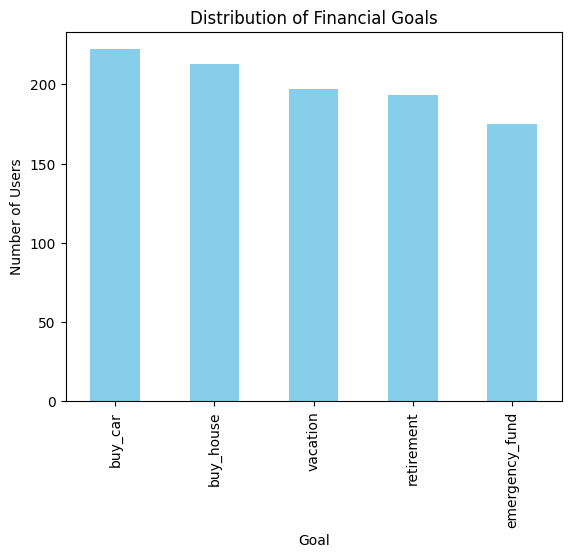

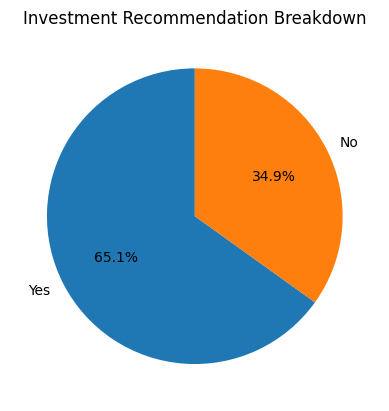

In [19]:
# Bar chart: Frequency of financial goals
df['Goal'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Financial Goals")
plt.xlabel("Goal")
plt.ylabel("Number of Users")
plt.show()

print()

# Pie chart: Investment recommendations
df['Invest_Recommended'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Investment Recommendation Breakdown")
plt.ylabel("")
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder

# Create encoders for categorical columns
goal_encoder = LabelEncoder()
risk_encoder = LabelEncoder()
invest_encoder = LabelEncoder()
insurance_encoder = LabelEncoder()

# Encode the text columns into numbers
df['Goal_encoded'] = goal_encoder.fit_transform(df['Goal'])
df['Risk_encoded'] = risk_encoder.fit_transform(df['Risk_Level'])
df['Invest_encoded'] = invest_encoder.fit_transform(df['Invest_Recommended'])  # Target
df['Insurance_encoded'] = insurance_encoder.fit_transform(df['Insurance_Recommended'])  # Target

# Drop unused columns (keep only numeric data)
df_model = df[['Income', 'Expenses', 'Goal_encoded', 'Risk_encoded',
               'Savings_Recommended', 'Invest_encoded', 'Insurance_encoded']]

df_model.head()


,Income,Expenses,Goal_encoded,Risk_encoded,Savings_Recommended,Invest_encoded,Insurance_encoded
0,23214,18706,0,1,2254,0,0
1,87306,57871,1,2,14717,1,1
2,71486,44759,0,0,13363,1,1
3,53130,38070,2,0,7530,1,1
4,42620,35710,2,1,3455,0,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Features to use
features = ['Income', 'Expenses', 'Goal_encoded', 'Risk_encoded', 'Savings_Recommended']

# Split for investment model
X_invest = df_model[features]
y_invest = df_model['Invest_encoded']

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_invest, y_invest, test_size=0.2, random_state=42)

# Train investment recommendation model
invest_model = DecisionTreeClassifier()
invest_model.fit(X_train_i, y_train_i)

# Evaluate
y_pred_i = invest_model.predict(X_test_i)
print("Investment Model Accuracy:", accuracy_score(y_test_i, y_pred_i))

# Split for insurance model
y_insurance = df_model['Insurance_encoded']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_invest, y_insurance, test_size=0.2, random_state=42)

# Train insurance recommendation model
insurance_model = DecisionTreeClassifier()
insurance_model.fit(X_train_s, y_train_s)

# Evaluate
y_pred_s = insurance_model.predict(X_test_s)
print("Insurance Model Accuracy:", accuracy_score(y_test_s, y_pred_s))


Investment Model Accuracy: 1.0
Insurance Model Accuracy: 0.94


In [22]:
def financial_assistant(income, expenses, goal, risk_level):
    # 1. Encode goal and risk
    goal_num = goal_encoder.transform([goal])[0]
    risk_num = risk_encoder.transform([risk_level])[0]

    # 2. Estimate savings
    savings = income - expenses
    savings_recommended = max(1000, int(savings * 0.5)) if savings > 0 else 0

    # 3. Create a DataFrame with column names
    user_df = pd.DataFrame([{
        'Income': income,
        'Expenses': expenses,
        'Goal_encoded': goal_num,
        'Risk_encoded': risk_num,
        'Savings_Recommended': savings_recommended
    }])

    # 4. Predict investment and insurance
    invest_pred = invest_model.predict(user_df)[0]
    insurance_pred = insurance_model.predict(user_df)[0]

    # 5. Decode predictions
    invest_result = invest_encoder.inverse_transform([invest_pred])[0]
    insurance_result = insurance_encoder.inverse_transform([insurance_pred])[0]

    # 6. Show results
    print("Personalized Financial Plan")
    print(f"- Monthly Income: ₹{income}")
    print(f"- Monthly Expenses: ₹{expenses}")
    print(f"- Savings Recommended: ₹{savings_recommended}")
    print(f"- Investment Recommendation: {invest_result}")
    print(f"- Insurance Recommendation: {insurance_result}")


In [23]:
# Example: A user with ₹55,000 income and ₹30,000 expenses saving for retirement with medium risk
financial_assistant(
    income=55000,
    expenses=30000,
    goal='retirement',
    risk_level='medium'
)


Personalized Financial Plan
- Monthly Income: ₹55000
- Monthly Expenses: ₹30000
- Savings Recommended: ₹12500
- Investment Recommendation: Yes
- Insurance Recommendation: No


In [24]:
import gradio as gr

def gradio_financial_assistant(income, expenses, goal, risk_level):
    goal_num = goal_encoder.transform([goal])[0]
    risk_num = risk_encoder.transform([risk_level])[0]
    savings = income - expenses
    savings_recommended = max(1000, int(savings * 0.5)) if savings > 0 else 0

    user_df = pd.DataFrame([{
        'Income': income,
        'Expenses': expenses,
        'Goal_encoded': goal_num,
        'Risk_encoded': risk_num,
        'Savings_Recommended': savings_recommended
    }])

    invest_pred = invest_model.predict(user_df)[0]
    insurance_pred = insurance_model.predict(user_df)[0]

    invest_result = invest_encoder.inverse_transform([invest_pred])[0]
    insurance_result = insurance_encoder.inverse_transform([insurance_pred])[0]

    return f"""### 📊 Personalized Financial Plan
- **Monthly Income:** ₹{income}
- **Monthly Expenses:** ₹{expenses}
- **Savings Recommended:** ₹{savings_recommended}
- **💼 Investment Recommendation:** {invest_result}
- **🛡️ Insurance Recommendation:** {insurance_result}
"""

with gr.Blocks() as demo:
    gr.Markdown("# 🤖 AI-Powered Financial Assistant")
    gr.Markdown("Fill in your financial details to get personalized advice.")

    with gr.Row():
        income = gr.Number(label="Monthly Income (₹)")
        expenses = gr.Number(label="Monthly Expenses (₹)")

    with gr.Row():
        goal = gr.Dropdown(choices=goals, label="Financial Goal")
        risk = gr.Dropdown(choices=risk_levels, label="Risk Level")

    submit_btn = gr.Button("Get My Financial Plan 💰")
    output = gr.Markdown()

    submit_btn.click(
        fn=gradio_financial_assistant,
        inputs=[income, expenses, goal, risk],
        outputs=output
    )

demo.launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
